## Importing all packages/data

In [133]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from matplotlib_venn import venn3

In [2]:
# Importing the neurons dataset, connections dataset, and the neurons flywire has classified as sugar/bitter/water/IR94e GRNs
# neurons = pd.read_csv('/Users/SydneyWalker/Downloads/neurons.csv.gz')

connections = pd.read_csv('/Users/SydneyWalker/Downloads/connections.csv.gz')
sugar_neurons = pd.read_csv('/Users/SydneyWalker/Downloads/sugar_neurons.csv').query("side == 'left'")
bitter_neurons = pd.read_csv('/Users/SydneyWalker/Downloads/bitter_neurons.csv').query("side == 'left'")
water_neurons = pd.read_csv('/Users/SydneyWalker/Downloads/water_neurons.csv').query("side == 'left'") #[['root_id','label','output_synapses']]
lowsalt_neurons = pd.read_csv('/Users/SydneyWalker/Downloads/lowsalt_neurons.csv').query("side == 'left'") #[['root_id','label','output_synapses']]

In [9]:
# importing the neurons {downstream} of sugar/bitter/water/IR94e

sugar_downstream = pd.read_csv('/Users/SydneyWalker/Downloads/sugar_downstream.csv').query("side == 'left'")[['root_id','label','input_synapses','output_synapses']]
bitter_downstream = pd.read_csv('/Users/SydneyWalker/Downloads/bitter_downstream.csv').query("side == 'left'")[['root_id','label','input_synapses','output_synapses']]
water_downstream = pd.read_csv('/Users/SydneyWalker/Downloads/water_downstream.csv').query("side == 'left'")[['root_id','label','input_synapses','output_synapses']]
lowsalt_downstream = pd.read_csv('/Users/SydneyWalker/Downloads/lowsalt_downstream.csv')[['root_id','label','input_synapses','output_synapses']]

In [7]:
# reorganizing the connections dataset to be ordered by the identifying upstream 
# neuron and labeling each by the number of synapses between them 
#THRESHOLD FOR LATER???????

results = connections.groupby(['pre_root_id', 'post_root_id','neuropil'])['syn_count'].sum().reset_index()

In [45]:
#gives us the number of upstream cells of all second order cells based on connections dataset

cells_upstream = connections.groupby('post_root_id')['pre_root_id'].nunique().reset_index()
cells_upstream.columns = ['second order cell ID', '# upstream cells']

### Looking at the proportion of input second-orders receive from their own modality (# synapses and # cells)
This code will provide information abut of second order order GRNs and their
- ratio of input taste/non-taste synapses
- ratio of input taste/non-taste cells
- number of output synapses  and their input/output synapse and cell ratios

In [54]:
# extracting sugar neurons from the results dataset, pre_root_id = sugar GRNs, post_root_id = first order
# sugar neurons
sugar_merge = pd.merge(results, sugar_neurons['root_id'], left_on = 'pre_root_id', right_on = 'root_id', how = 'inner')
sugar_merge = sugar_merge.drop(columns='root_id')

sugar_merge2 = pd.merge(sugar_merge, sugar_downstream, left_on = 'post_root_id', right_on = 'root_id', how = 'inner')
sugar_connections = sugar_merge2.groupby('post_root_id')['syn_count'].sum().reset_index()
sugar_labels = pd.merge(sugar_connections, sugar_downstream,left_on = 'post_root_id', right_on = 'root_id', how = 'inner')
sugar_labels = sugar_labels.drop(columns = 'root_id')

sugar_labels.rename(columns={'input_synapses': 'total # input synapses','syn_count':'# input sugar GRN synapses','post_root_id':'second order cell ID'}, inplace=True)
sugar_labels['% input from sugar GRNs'] = sugar_labels['# input sugar GRN synapses'] / sugar_labels['total # input synapses'] * 100
sugar_labels = sugar_labels.sort_values(by = '% input from sugar GRNs', ascending = False)

sugar_upstream = sugar_merge2.groupby('post_root_id')['pre_root_id'].nunique().reset_index()
sugar_upstream.columns = ['second order cell ID', '# upstream sugar cells']

sugar_labels2 = pd.merge(sugar_labels, sugar_upstream, on = 'second order cell ID')
sugar_labels2 = pd.merge(sugar_labels2, cells_upstream, on = 'second order cell ID', how = 'inner')

#SUGAR_LABELS2 

In [56]:
water_merge = pd.merge(results, water_neurons['root_id'], left_on = 'pre_root_id', right_on = 'root_id', how = 'inner')
water_merge = water_merge.drop(columns='root_id')

water_merge2 = pd.merge(water_merge, water_downstream, left_on = 'post_root_id', right_on = 'root_id', how = 'inner')
water_connections = water_merge2.groupby('post_root_id')['syn_count'].sum().reset_index()

water_labels = pd.merge(water_connections, water_downstream,left_on = 'post_root_id', right_on = 'root_id', how = 'inner')
water_labels = water_labels.drop(columns = 'root_id')

water_labels.rename(columns={'input_synapses': 'total # input synapses','syn_count':'# input water GRN synapses','post_root_id':'second order cell ID'}, inplace=True)
water_labels['% input from water GRNs'] = water_labels['# input water GRN synapses'] / water_labels['total # input synapses'] * 100
water_labels = water_labels.sort_values(by = '% input from water GRNs', ascending = False)

water_upstream = water_merge2.groupby('post_root_id')['pre_root_id'].nunique().reset_index()
water_upstream.columns = ['second order cell ID', '# upstream water cells']

water_labels2 = pd.merge(water_labels, water_upstream, on = 'second order cell ID')
water_labels2 = pd.merge(water_labels2, cells_upstream, on = 'second order cell ID', how = 'inner')

#WATER_LABELS2

In [46]:
bitter_merge = pd.merge(results, bitter_neurons['root_id'], left_on = 'pre_root_id', right_on = 'root_id', how = 'inner')
bitter_merge = bitter_merge.drop(columns='root_id')

bitter_merge2 = pd.merge(bitter_merge, bitter_downstream, left_on = 'post_root_id', right_on = 'root_id', how = 'inner')
bitter_connections = bitter_merge2.groupby('post_root_id')['syn_count'].sum().reset_index()

bitter_labels = pd.merge(bitter_connections, bitter_downstream,left_on = 'post_root_id', right_on = 'root_id', how = 'inner')
bitter_labels = bitter_labels.drop(columns = 'root_id')

bitter_labels.rename(columns={'input_synapses': 'total # input synapses','syn_count':'# input bitter GRN synapses','post_root_id':'second order cell ID'}, inplace=True)
bitter_labels['% input from bitter GRNs'] = bitter_labels['# input bitter GRN synapses'] / bitter_labels['total # input synapses'] * 100
bitter_labels = bitter_labels.sort_values(by = '% input from bitter GRNs', ascending = False)

bitter_upstream = bitter_merge2.groupby('post_root_id')['pre_root_id'].nunique().reset_index()
bitter_upstream.columns = ['second order cell ID', '# upstream bitter cells']

bitter_labels2 = pd.merge(bitter_labels, bitter_upstream, on = 'second order cell ID')
bitter_labels2 = pd.merge(bitter_labels2, cells_upstream, on = 'second order cell ID', how = 'inner')

#BITTER_LABELS2

In [42]:
result = connections.groupby(['pre_root_id', 'post_root_id','neuropil'])['syn_count'].sum().reset_index()

lowsalt_merge = pd.merge(result, lowsalt_neurons['root_id'], left_on = 'pre_root_id', right_on = 'root_id', how = 'inner')
lowsalt_merge = lowsalt_merge.drop(columns='root_id')

lowsalt_merge2 = pd.merge(lowsalt_merge, lowsalt_downstream, left_on = 'post_root_id', right_on = 'root_id', how = 'inner')
lowsalt_connections = lowsalt_merge2.groupby(['post_root_id'])['syn_count'].sum().reset_index()

lowsalt_labels = pd.merge(lowsalt_connections, lowsalt_downstream,left_on = 'post_root_id', right_on = 'root_id', how = 'inner')
lowsalt_labels = lowsalt_labels.drop(columns = 'root_id')

lowsalt_labels.rename(columns={'input_synapses': 'total_num_input_synapses','syn_count':'num_input_lowsalt_synapses','post_root_id':'second_order_cell_ID'}, inplace=True)
lowsalt_labels['percent_input_from_lowsalt_GRNs'] = lowsalt_labels['num_input_lowsalt_synapses'] / lowsalt_labels['total_num_input_synapses'] * 100
lowsalt_labels = lowsalt_labels.sort_values(by = 'percent_input_from_lowsalt_GRNs', ascending = False)

lowsalt_upstream = lowsalt_merge2.groupby('post_root_id')['pre_root_id'].nunique().reset_index()
lowsalt_upstream.columns = ['second_order_cell_ID', 'num_upstream_lowsalt_cells']

lowsalt_labels2 = pd.merge(lowsalt_labels, lowsalt_upstream, on = 'second_order_cell_ID')
lowsalt_labels2 = pd.merge(lowsalt_labels2, cells_upstream, on = 'second_order_cell_ID', how = 'inner')

#LOWSALT_LABELS2

In [ ]:
# This funtion will output second order cells and their input/output synapses

def function(result, taste_neurons, neuron_downstream, name):
    merge = pd.merge(result, taste_neurons['root_id'], left_on = 'pre_root_id', right_on = 'root_id', how = 'inner')
    merge = merge.drop(columns='root_id')
    merge2 = pd.merge(merge, neuron_downstream, left_on = 'post_root_id', right_on = 'root_id', how = 'inner')
    connections = merge2.groupby('post_root_id')['syn_count'].sum().reset_index()
    labels = pd.merge(connections, neuron_downstream,left_on = 'post_root_id', right_on = 'root_id', how = 'inner')
    labels = labels.drop(columns = 'root_id')
    labels.rename(columns={'input_synapses': 'total_#_input_synapses','syn_count':'#_input_' + name + '_synapses','post_root_id':'second_order_cell_ID'}, inplace=True)
    labels['% input from ' + name + ' GRNs'] = labels['#_input_' + name + '_synapses'] / labels['total_#_input_synapses'] * 100
    labels = labels.sort_values(by = '% input from ' + name + ' GRNs', ascending = False)
    return labels

In [ ]:
# Second order cells and their input/output synapses

sugar_data = function(results, sugar_neurons, sugar_downstream, "sugar")
bitter_data = function(results, bitter_neurons, bitter_downstream, "bitter")
water_data = function(results, water_neurons, water_downstream, "water")
lowsalt_data = function(results, lowsalt_neurons, lowsalt_downstream, "lowsalt")

### Looking at the cross-over between modalities within the second-order cells
This code will provide information about how many cells are downstream from multiple distinct taste modalities 

In [39]:
#This function identifies neurons that are classified as both sugar and water second order cells

def overlap(neuron_data1, neuron_data2, taste1, taste2):
    merge = pd.merge(neuron_data1[['second_order_cell_ID', 'label','#_input_' + taste1 + '_synapses', '% input from ' + taste1 + ' GRNs']], neuron_data2[['second_order_cell_ID', '#_input_' + taste2 + '_synapses','% input from ' + taste2 + ' GRNs','total_#_input_synapses']], on= 'second_order_cell_ID', how = 'inner')
    return merge

In [131]:
# The neurons that receive input from multiple taste modalities 

sugarwater = overlap(sugar_data, water_data, "sugar", "water")
sugarbitter = overlap(sugar_data, bitter_data, "sugar", "bitter")
waterbitter = overlap(water_data, bitter_data, "water", "bitter")
sugarlowsalt = overlap(sugar_data, lowsalt_data, "sugar", "lowsalt")
waterlowsalt =  overlap(water_data, lowsalt_data, "water", "lowsalt")
lowsaltbitter = overlap(lowsalt_data, bitter_data, "lowsalt", "bitter")

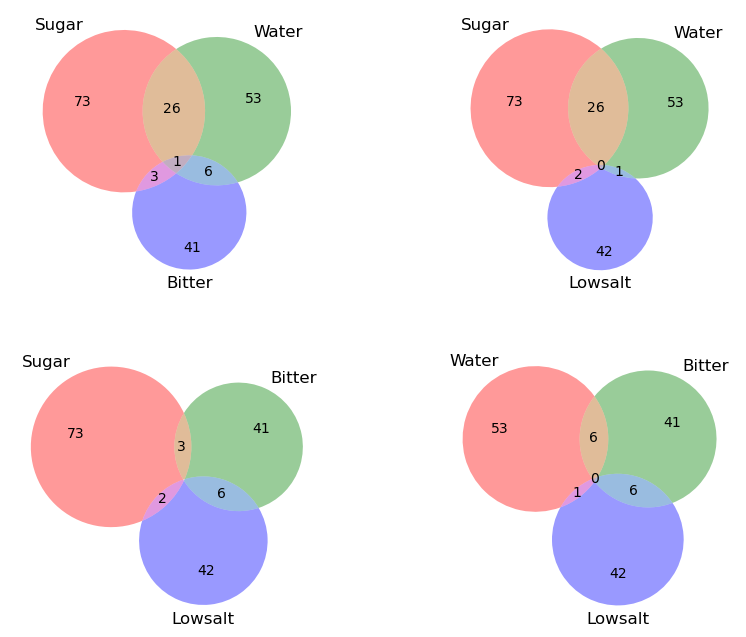

In [144]:
#Creating a venn diagram to display the crossover between the four taste modalities 

sugar = set(sugar_downstream['root_id'])
water = set(water_downstream['root_id'])
bitter = set(bitter_downstream['root_id'])
lowsalt = set(lowsalt_downstream['root_id'])

size_sugar = len(sugar)
size_water = len(water)
size_bitter = len(bitter)
size_lowsalt = len(lowsalt)
overlap_sugarwater = len(sugar.intersection(water))
overlap_sugarbitter = len(sugar.intersection(bitter))
overlap_sugarlowsalt = len(sugar.intersection(lowsalt))
overlap_waterbitter = len(water.intersection(bitter))
overlap_waterlowsalt = len(water.intersection(lowsalt))
overlap_bitterlowsalt = len(bitter.intersection(lowsalt))
overlap_sugarwaterbitter = len(sugar.intersection(water).intersection(bitter))
overlap_sugarbitterlowsalt = len(sugar.intersection(bitter).intersection(lowsalt))
overlap_sugarwaterlowsalt = len(sugar.intersection(water).intersection(lowsalt))
overlap_waterbitterlowsalt = len(water.intersection(bitter).intersection(lowsalt))


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

venn3(subsets=(size_sugar, size_water, overlap_sugarwater, size_bitter, overlap_sugarbitter, overlap_waterbitter, overlap_sugarwaterbitter),
             set_labels=('Sugar', 'Water', 'Bitter'),
             ax=axes[0, 0])

venn3(subsets=(size_sugar, size_water, overlap_sugarwater, size_lowsalt, overlap_sugarlowsalt, overlap_waterlowsalt, overlap_sugarwaterlowsalt),
             set_labels=('Sugar', 'Water', 'Lowsalt'),
             ax=axes[0, 1])

venn3(subsets=(size_sugar, size_bitter, overlap_sugarbitter, size_lowsalt, overlap_sugarlowsalt, overlap_bitterlowsalt, overlap_sugarbitterlowsalt),
             set_labels=('Sugar', 'Bitter', 'Lowsalt'),
             ax=axes[1, 0])

venn3(subsets=(size_water, size_bitter, overlap_waterbitter, size_lowsalt, overlap_waterlowsalt, overlap_bitterlowsalt, overlap_waterbitterlowsalt),
             set_labels=('Water', 'Bitter', 'Lowsalt'),
             ax=axes[1, 1])
plt.show()

In [129]:
# Creating a function that tracks the input

def overlap(neuron_data1, neuron_data2, taste1, taste2):
    merge = pd.merge(neuron_data1[['second_order_cell_ID', 'label','#_input_' + taste1 + '_synapses', '% input from ' + taste1 + ' GRNs']], neuron_data2[['second_order_cell_ID', '#_input_' + taste2 + '_synapses','% input from ' + taste2 + ' GRNs','total_#_input_synapses']], on= 'second_order_cell_ID', how = 'inner')
    return merge

### Looking at the location of projections for second order cells in all modalities 

In [104]:
# This function classifies neurons as local or non-local based on whether they have one or more 
# connections outside of the SEZ
# THRESHOLD ????

def classify(taste_third_order):
    classification = pd.DataFrame(columns = ['second_order_cell_ID', 'projection','#_of_external_projections'])
    unique_values = taste_third_order['second_order_cell_ID'].unique()
    for entry in unique_values:
        if all(taste_third_order[taste_third_order['second_order_cell_ID'] == entry]['location_of_connection'] == 'local'):
            x = pd.DataFrame({'second_order_cell_ID': [entry], 'projection':'local','#_of_external_projections':(taste_third_order[taste_third_order['second_order_cell_ID'] == entry]['location_of_connection'] == 'outside SEZ').sum()})
            classification = pd.concat([classification,x])
        else:
            x = pd.DataFrame({'second_order_cell_ID': [entry], 'projection':'outside SEZ','#_of_external_projections':(taste_third_order[taste_third_order['second_order_cell_ID'] == entry]['location_of_connection'] == 'outside SEZ').sum()})
            classification = pd.concat([classification,x])
    return classification

In [108]:
# Outputs second order cells and their classification of local/outside SEZ and their number
# of external projections

sugar_second_order_projection = classify(sugar_third_order)
bitter_second_order_projection = classify(bitter_third_order)
water_second_order_projection = classify(water_third_order)
lowsalt_second_order_projection = classify(lowsalt_third_order)

In [ ]:
# Pie chart of the location of ACH connections for second order sugar neurons

labels = ['GNG', 'PRW', 'FLA_R', 'FLA_L', 'SAD', 'LH_L', 'SLP_L', 'SCL_L', 'PVLP_L', 'SIP_L', 'SMP_L', 'MB_VL_L', 'VES_L']
sizes = [len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'GNG')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'PRW')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'FLA_R')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'FLA_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SAD')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'LH_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SLP_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SCL_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'PVLP_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SIP_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SMP_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'MB_VL_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'VES_L')])]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
plt.title('Locations of ACH Connections for Sugar')
plt.axis('equal')
plt.show()

In [ ]:
# Pie chart of the location of all NT connections for second order sugar neurons

labels = ['GNG', 'PRW', 'FLA_R', 'FLA_L', 'SAD', 'LH_L', 'SLP_L', 'SCL_L', 
            'PVLP_L', 'SIP_L', 'SMP_L', 'MB_VL_L', 'VES_L']
sizes = [len(sugar_third_order[sugar_third_order['neuropil'] == 'GNG']),len(sugar_third_order[sugar_third_order['neuropil'] == 'PRW']),len(sugar_third_order[sugar_third_order['neuropil'] == 'FLA_R']),
len(sugar_third_order[sugar_third_order['neuropil'] == 'FLA_L']),len(sugar_third_order[sugar_third_order['neuropil'] == 'SAD']),len(sugar_third_order[sugar_third_order['neuropil'] == 'LH_L']),
len(sugar_third_order[sugar_third_order['neuropil'] == 'SLP_L']),len(sugar_third_order[sugar_third_order['neuropil'] == 'SCL_L']),len(sugar_third_order[sugar_third_order['neuropil'] == 'PVLP_L']),
len(sugar_third_order[sugar_third_order['neuropil'] == 'SIP_L']),len(sugar_third_order[sugar_third_order['neuropil'] == 'SMP_L']),len(sugar_third_order[sugar_third_order['neuropil'] == 'MB_VL_L']),
len(sugar_third_order[sugar_third_order['neuropil'] == 'VES_L']),]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
plt.title('Locations of Connections for Sugar')
plt.axis('equal')
plt.show()

In [ ]:
# Pie chart of the location of ACH connections for second order bitter neurons

labels = ['GNG', 'PRW', 'FLA_R', 'FLA_L', 'SAD', 'LH_L', 'SLP_L', 'SCL_L', 
            'PVLP_L', 'SIP_L', 'SMP_L','AVLP_L','MB_PED_L','AL_L','MB_CA_L','SLP_R','SIP_R']
sizes = [len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'GNG')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'PRW')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'FLA_R')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'FLA_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SAD')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'LH_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SLP_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SCL_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'PVLP_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SIP_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SMP_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'AVLP_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'MB_PED_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'AL_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'MB_CA_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SLP_R')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SIP_R')])]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
plt.title('Locations of ACH Connections for Bitter')
plt.axis('equal')
plt.show()

In [ ]:
# Pie chart of the location of all NT connections for second order bitter neurons

labels = ['GNG', 'PRW', 'FLA_R', 'FLA_L', 'SAD', 'LH_L', 'SLP_L', 'SCL_L', 
            'PVLP_L', 'SIP_L', 'SMP_L','AVLP_L','MB_PED_L','AL_L','MB_CA_L','SLP_R','SIP_R']
sizes = [len(bitter_third_order[bitter_third_order['neuropil'] == 'GNG']),len(bitter_third_order[bitter_third_order['neuropil'] == 'PRW']),len(bitter_third_order[bitter_third_order['neuropil'] == 'FLA_R']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'FLA_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'SAD']),len(bitter_third_order[bitter_third_order['neuropil'] == 'LH_L']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'SLP_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'SCL_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'PVLP_L']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'SIP_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'SMP_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'AVLP_L']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'MB_PED_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'AL_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'MB_CA_L']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'SLP_R']),len(bitter_third_order[bitter_third_order['neuropil'] == 'SIP_R'])]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
plt.title('Location of Connections for Bitter')
plt.axis('equal')
plt.show()

In [ ]:
# Pie chart of the location of ACH connections for second order water neurons

labels = ['GNG', 'PRW', 'FLA_R', 'FLA_L', 'SAD', 'LH_L', 'SLP_L', 'SCL_L', 
            'PVLP_L','AL_L','MB_CA_L','VES_L','PLP_L']
sizes = [len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'GNG')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'PRW')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'FLA_R')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'FLA_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SAD')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'LH_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SLP_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SCL_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'PVLP_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'AL_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'MB_CA_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'VES_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'PLP_L')])]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
plt.title('Location of ACH Connections for Water')
plt.axis('equal')
plt.show()


In [ ]:
# Pie chart of the location of all NT connections for second order water neurons

labels = ['GNG', 'PRW', 'FLA_R', 'FLA_L', 'SAD', 'LH_L', 'SLP_L', 'SCL_L', 
            'PVLP_L','AL_L','MB_CA_L','VES_L','PLP_L']
sizes = [len(bitter_third_order[bitter_third_order['neuropil'] == 'GNG']),len(bitter_third_order[bitter_third_order['neuropil'] == 'PRW']),len(bitter_third_order[bitter_third_order['neuropil'] == 'FLA_R']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'FLA_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'SAD']),len(bitter_third_order[bitter_third_order['neuropil'] == 'LH_L']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'SLP_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'SCL_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'PVLP_L']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'AL_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'MB_CA_L']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'VES_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'PLP_L']),]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
plt.title('Location of Connections for Water')
plt.axis('equal')
plt.show()

In [ ]:
# Pie chart of the location of ACH connections for second order IR94e neurons

labels = ['GNG', 'PRW', 'FLA_R', 'FLA_L','SAD', 'LH_L', 'SLP_L', 'SCL_L', 
             'SIP_L', 'SMP_L','AVLP_L','SLP_R','LH_R','VES_L']

sizes = [len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'GNG')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'PRW')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'FLA_R')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'FLA_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SAD')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'LH_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SLP_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SCL_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SIP_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SMP_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'AVLP_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SLP_R')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'LH_R')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'VES_L')])]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
plt.title('Location of ACH Connections for Lowsalt')
plt.axis('equal')
plt.show()

In [ ]:
# Pie chart of the location of all NT connections for second order IR94e neurons

labels = ['GNG', 'PRW', 'FLA_R', 'FLA_L','SAD', 'LH_L', 'SLP_L', 'SCL_L', 
             'SIP_L', 'SMP_L','AVLP_L','SLP_R','LH_R','VES_L']

sizes = [len(bitter_third_order[bitter_third_order['neuropil'] == 'GNG']),len(bitter_third_order[bitter_third_order['neuropil'] == 'PRW']),len(bitter_third_order[bitter_third_order['neuropil'] == 'FLA_R']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'FLA_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'SAD']),len(bitter_third_order[bitter_third_order['neuropil'] == 'LH_L']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'SLP_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'SCL_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'SIP_L']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'SMP_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'AVLP_L']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'SLP_R']),len(bitter_third_order[bitter_third_order['neuropil'] == 'LH_R']),len(bitter_third_order[bitter_third_order['neuropil'] == 'VES_L'])]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
plt.title('Location of Connections for Lowsalt')
plt.axis('equal')
plt.show()

In [ ]:
# Classifying second order to third order connections based on where within the connectome they're located
# This funciton outputs a pie chart of the NT types for local connections

def local_NTs(taste_third_order):
    local = taste_third_order[taste_third_order['location_of_connection'] == 'local']
    labels = ['ACH','GLUT','GABA','SER','DA']
    sizes = [len(local[local['nt_type'] == 'ACH']), len(local[local['nt_type'] == 'GLUT']), len(local[local['nt_type'] == 'GABA']), len(local[local['nt_type'] == 'SER']), len(local[local['nt_type'] == 'SER'])]
    plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
    plt.title('NT types for local connections')
    plt.axis('equal')
    plt.show()

# This funciton outputs a pie chart of the NT types for non-local connections

def nonlocal_NTs(taste_third_order):
    local = taste_third_order[taste_third_order['location_of_connection'] == 'outside SEZ']
    labels = ['ACH','GLUT','GABA','SER','DA']
    sizes = [len(local[local['nt_type'] == 'ACH']), len(local[local['nt_type'] == 'GLUT']), len(local[local['nt_type'] == 'GABA']), len(local[local['nt_type'] == 'SER']), len(local[local['nt_type'] == 'SER'])]
    plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
    plt.title('NT types for non-local connections')
    plt.axis('equal')
    plt.show()

### Looking at third order cells for IR94e modality
This code identifies the third order IR94e cells and tells us whether their synapse connections to second order IR94e cells are within the SEZ

In [60]:
# Creating a funtion to classify whether connections are within or outside of the SEZ

def projection(neuropil):
    if neuropil == 'GNG':
        return 'local'
    else:
        return 'outside SEZ'

In [62]:
# Second to third order connections for IR94e

third_order_connections = (pd.merge(lowsalt_labels2[['second_order_cell_ID','label']], connections, left_on='second_order_cell_ID', right_on='pre_root_id', how = 'inner').query("syn_count >=5"))
third_order_connections['projection'] = third_order_connections['neuropil'].apply(projection)
third_order_connections = third_order_connections.drop(columns=['pre_root_id'])
third_order_connections = third_order_connections.rename(columns={'post_root_id':'third_order_cell_ID','label':'second_order_cell_label'})

### Identifying third order neurons for all modalities

This code will provide information about third order order GRNs and their
- second order cells their connected to 
- the synapse count for each connection
- the neurotransmitter type involved in each connection
- the location of each connection 
- the number of upstream second order cells
- the variation in NT type for upstream connections

Threshold for a neuron to be identified as third order: 5 synapses


In [66]:
# This function will output second to third order connections, synapse count and their location
# Minimum number of synapses = 5

def third_order(neuron_data, connection_dataset,taste_neurons):
    for entry in neuron_data['second_order_cell_ID']:
        if entry in sugar_neurons['root_id']:
            pass
        else:
            merge = pd.merge(neuron_data[['second_order_cell_ID','label']], connections, left_on='second_order_cell_ID', right_on='pre_root_id', how = 'inner').query("syn_count >=5")
        merge = merge.drop(columns = 'pre_root_id')
        merge = merge.rename(columns={'post_root_id':'third_order_cell_ID','label':'second_order_cell_label'})
        def projection(neuropil):
            if neuropil == 'GNG':
                return 'local'
            else: 
                return 'outside SEZ'
        merge['location_of_connection'] = merge['neuropil'].apply(projection)
        return merge

In [76]:
# Second to third order connections, synapse count and their location

sugar_third_order = third_order(sugar_data, connections, sugar_neurons)
bitter_third_order = third_order(bitter_data, connections, bitter_neurons)
water_third_order = third_order(water_data, connections, water_neurons)
lowsalt_third_order = third_order(lowsalt_data, connections, lowsalt_neurons)

In [98]:
# this function returns the number of cells upstream from each third order and for all of their connections
# the % input they're receiving from the top NT

def upstream_cells(taste_third_order):
    cells = pd.DataFrame(columns = ['third_order_cell_ID','#_upstream_cells','% input of top NT'])
    unique_values = taste_third_order['third_order_cell_ID'].unique()
    for entry in unique_values:
        x = pd.DataFrame({'third_order_cell_ID' : [entry], '#_upstream_cells' : len(taste_third_order[taste_third_order['third_order_cell_ID'] == entry ]['second_order_cell_ID'].unique()),
        '% input of top NT': max(taste_third_order[taste_third_order['third_order_cell_ID'] == entry]['nt_type'].value_counts())/sum(taste_third_order[taste_third_order['third_order_cell_ID'] == entry]['nt_type'].value_counts())
})
        cells = pd.concat([cells,x])
    return cells      

sugar3N_upstream_cells = upstream_cells(sugar_third_order)
bitter3N_upstream_cells = upstream_cells(bitter_third_order)
water3N_upstream_cells = upstream_cells(water_third_order)
lowsalt3N_upstream_cells = upstream_cells(lowsalt_third_order)

In [ ]:
# This creates a bar graph of whether all of the connections to a third order cell involves 
# one NT type or multiple

data = lowsalt3N_upstream_cells[lowsalt3N_upstream_cells['#_upstream_cells'] != 1]['% input of top NT'] 

num_bins = 15
bins = np.linspace(min(data), max(data), num_bins + 1)
frequencies, bin_edges = np.histogram(data, bins)
bin_labels = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]
plt.bar(bin_labels, frequencies, width=(max(data) - min(data)) / num_bins * 0.8, align='center')
plt.xlabel('Percent Input from top NT')
plt.ylabel('Frequency')
plt.title('Variation in NTs from Upstream Cells, Lowsalt')
plt.show()